# Importing Python libraries

In [105]:
# import python libraries

import pandas as pd
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing datasets 

In [74]:
# Importing datasets
data=pd.read_csv('data.csv') # dataset with objects (samples) and relative features (genes)
labels=pd.read_csv('labels.csv') # dataset with objects (samples) and relative labels (tumor class)

# Data exploration

In [10]:
####################
# Data exploration #
####################

# display first 5 rows of each dataset
data.head(5)
labels.head(5)

# display total number of rows and columns in each dataset
data.shape
labels.shape

# statistical description of the dataset with objects and relative features
data.describe()

# understand further the variabale to predict 
labels['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

# Data preprocessing

In [102]:
#########################
# 1. Data preprocessing #
#########################

# store the feature sets into the X variable and the series of corresponding labels into the Y variable
X=data.iloc[:,1:]
Y=labels.iloc[:,1]

In [101]:
##########################
# 1. Missing value ratio #
##########################

# checking and saving missing values in a variable
missing_values = data.isnull().sum()/len(data)*100

# saving column names into a variable
variables = data.columns
variable = [ ]

for i in range(0, 20532):
    if a[i]<=20:   # setting the threshold as 20%
        variable.append(variables[i])

### Converting categorical data

In [33]:
####################
# 2. Label Encoder #
####################

# convert categorical data (BRCA, KIRC, LUAD, PRAD, COAD) into numbers
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

### Splitting the datasets

In [34]:
##############################################
# 3. Divide data into training and test sets #
##############################################

# split the dataset into 70% train and 30% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [57]:
#################################
# 4. Standardizing the features #
#################################

# standard scalar normalization to normalize the features (PCA performs best with normalized features)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
########################################
# 5. Dimensionality reduction with PCA #
########################################

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Training and making predictions

In [109]:
# logistic regression model training and testing

classifier_1= LogisticRegression(C=5)

# train the model
classifier_1.fit(X_train, Y_train)

# test the model using the test dataset
Y_pred1 = classifier_1.predict(X_test)

In [61]:
# nearest neighbor training and testing
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_2.fit(X_train, Y_train)
Y_pred2 = classifier_2.predict(X_test)

In [62]:
# SVM training and testing
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_3.fit(X_train, Y_train)
Y_pred3 = classifier_3.predict(X_test)

In [63]:
# kernel SVM training and testing
classifier_4 = SVC(kernel = 'rbf', random_state = 0)
classifier_4.fit(X_train, Y_train)
Y_pred4 = classifier_4.predict(X_test)

In [64]:
# naive bayes training and testing
classifier_5 = GaussianNB()
classifier_5.fit(X_train, Y_train)
Y_pred5 = classifier_5.predict(X_test)

In [65]:
# decision tree algorithm training and testing
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_6.fit(X_train, Y_train)
Y_pred6 = classifier_6.predict(X_test)

In [66]:
# random forest classification training and testing
classifier_7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_7.fit(X_train, Y_train)
Y_pred7 = classifier_7.predict(X_test)

# Model performance evaluation

0.5572139303482587


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

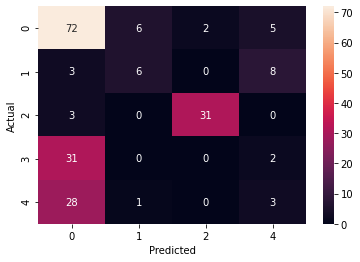

In [110]:
# logistic regression model evaluation
print (accuracy_score(Y_test, Y_pred1))
confusion_matrix = pd.crosstab(Y_test, Y_pred1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.5223880597014925


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

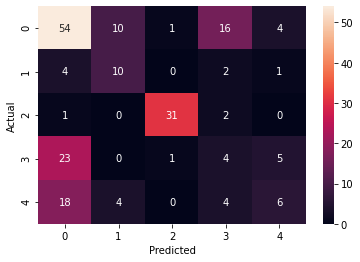

In [68]:
# nearest neighbor model evaluation
print (accuracy_score(Y_test, Y_pred2))
confusion_matrix = pd.crosstab(Y_test, Y_pred2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.572139303482587


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

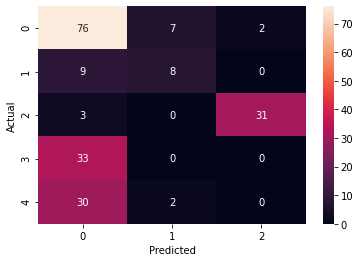

In [69]:
# SVM model evaluation
print (accuracy_score(Y_test, Y_pred3))
confusion_matrix = pd.crosstab(Y_test, Y_pred3, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.572139303482587


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

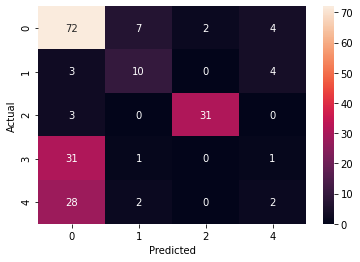

In [70]:
# kernel SVM model evaluation
print (accuracy_score(Y_test, Y_pred4))
confusion_matrix = pd.crosstab(Y_test, Y_pred4, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.5671641791044776


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

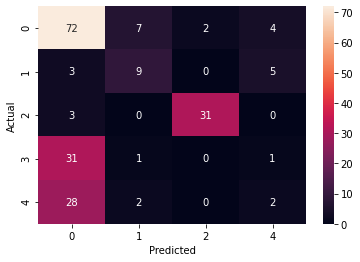

In [71]:
# naive bayes model evaluation
print (accuracy_score(Y_test, Y_pred5))
confusion_matrix = pd.crosstab(Y_test, Y_pred5, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.4577114427860697


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

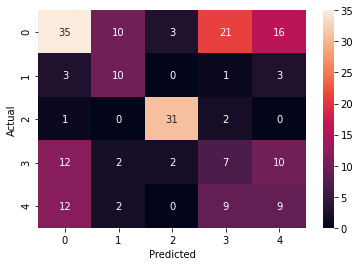

In [72]:
# decision tree alogorithm model evaluation
print (accuracy_score(Y_test, Y_pred6))
confusion_matrix = pd.crosstab(Y_test, Y_pred6, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

0.44776119402985076


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

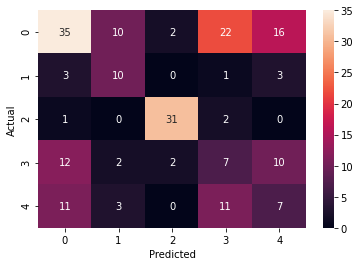

In [73]:
# random forest classification model evaluation
print (accuracy_score(Y_test, Y_pred7))
confusion_matrix = pd.crosstab(Y_test, Y_pred7, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)